In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import re
# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\sanja\Downloads\laptop_details.csv")

In [4]:
df.head()
df.tail()
df.size
df.shape
df.info()
df.describe()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


,Product,Rating,MRP,Feature
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


2880

(720, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [5]:
df.isna().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [6]:
np.random.seed(0)
l=[]
for i in range(0,5):
    a=np.random.random_integers(1,10)
    print(a)
    l.append(a)
for i in l:
    df.Feature[i]

6
1
4
4
8


'Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR'

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

'Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty'

'Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty'

'Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayNA1 Year Domestic Warranty'

In [7]:
# Processor Information

regex = r'(?:AMD|Intel|M1|Apple M2|Qualcomm)[\s\w]+Processor'
df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [8]:
regex = r'GB([\s\w]+)RAM'
df['RAM_TYPE'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [9]:
regex = r'RAM([A-z0-9]+\s.+System)'
df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [10]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [11]:
regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))

In [12]:
#regex = r'\((\d+(?:\.\d+)?) inch\)'
#df['DisplaySize'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [13]:
df.Feature[0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [14]:
regex=r'(\d+\sGB)[\s\w]+RAM'
df['RAM']=df['Feature'].apply(lambda x : re.findall(regex, x))

In [15]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.RAM_TYPE = df.RAM_TYPE.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
# df.DisplaySize = df.DisplaySize.apply(lambda x : ''.join(x))

In [16]:
df

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,ASUS,8 GB
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,LPDDR4,Chrome Operating System,,ASUS,4 GB
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8 GB
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,DDR5,64 bit Windows 11 Operating System,1 TB SSD,ASUS,16 GB
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,LPDDR5,64 bit Windows 11 Operating System,512 GB SSD,ASUS,16 GB


## Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM_TYPE   720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
 9   RAM        720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


### Checking Null Values

In [18]:
df.isna().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM_TYPE       0
OS             0
Storage        0
Brand          0
RAM            0
dtype: int64

In [19]:
df.replace('',np.nan,inplace=True)

In [20]:
df.RAM.replace('128 GB8 GB','8 GB',inplace=True)

In [21]:
df.RAM.replace('4 GB','4',inplace=True)
df.RAM.replace('8 GB','8',inplace=True)
df.RAM.replace('16 GB','16',inplace=True)
df.RAM.replace('32 GB','32',inplace=True)

In [22]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,ASUS,8


In [23]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Processor', 'RAM_TYPE', 'OS',
       'Storage', 'Brand', 'RAM'],
      dtype='object')

In [24]:
df.RAM.unique()

array(['8', '16', '4', '32'], dtype=object)

In [25]:
df.isna().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM_TYPE       0
OS             0
Storage       10
Brand          0
RAM            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM_TYPE   720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    710 non-null    object 
 8   Brand      720 non-null    object 
 9   RAM        720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


In [27]:
df.OS.value_counts()

64 bit Windows 11 Operating System                                                404
Windows 11 Operating System                                                       156
64 bit Windows 10 Operating System                                                116
Mac OS Operating System                                                            19
Windows 10 Operating System                                                        12
Chrome Operating System                                                             6
DOS Operating System                                                                2
64 bit DOS Operating System                                                         2
32 bit Windows 11 Operating System                                                  1
64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplaySystem      1
64 bit Chrome Operating System                                                      1
Name: OS, dtype: int64

In [28]:
df.Rating.fillna(df.Rating.median(),inplace=True)
df.Storage.fillna(df.Storage.mode().values[0], inplace=True)

In [29]:
df

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,ASUS,8
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,LPDDR4,Chrome Operating System,512 GB SSD,ASUS,4
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,DDR5,64 bit Windows 11 Operating System,1 TB SSD,ASUS,16
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,LPDDR5,64 bit Windows 11 Operating System,512 GB SSD,ASUS,16


In [30]:
df.isna().sum()

Product      0
Rating       0
MRP          0
Feature      0
Processor    0
RAM_TYPE     0
OS           0
Storage      0
Brand        0
RAM          0
dtype: int64

In [31]:
df.duplicated().value_counts()

False    423
True     297
dtype: int64

In [32]:
df[df.Product.duplicated()]

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM
25,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,RedmiBook,8
26,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
27,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,4.3,"₹1,96,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,AMD Ryzen 9 Octa Core Processor,DDR5,Windows 11 Operating System,1 TB SSD,ASUS,16
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...,Intel Core i3 Processor,DDR4,64 bit Windows 10 Operating System,256 GB SSD,realme,8
30,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,"₹38,705",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Quad Core Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
...,...,...,...,...,...,...,...,...,...,...
708,ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...,3.9,"₹44,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,64 bit Windows 10 Operating System,1 TB HDD,ASUS,8
710,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,4.2,"₹35,590",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,AMD Ryzen 3 Dual Core Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
711,ASUS ROG Strix G15 Advantage Edition with 90Wh...,4.9,"₹1,50,990",AMD Ryzen 9 Octa Core Processor16 GB DDR4 RAMW...,AMD Ryzen 9 Octa Core Processor,DDR4,Windows 11 Operating System,1 TB SSD,ASUS,16
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8


In [33]:
df.Product.nunique()

410

In [34]:
#plt.figure(figsize=(8,50))
#sns.countplot(data=df,y='Product')

In [35]:
df.drop_duplicates(keep='first',inplace=True)

In [36]:
df

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,ASUS,8
...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,4.3,"₹76,590",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel Core i5 Processor,DDR5,64 bit Windows 11 Operating System,512 GB SSD,DELL,16
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,"₹90,000",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,16
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,LPDDR4,Chrome Operating System,512 GB SSD,ASUS,4
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,LPDDR5,64 bit Windows 11 Operating System,512 GB SSD,ASUS,16


In [37]:
df.MRP=df.MRP.str.replace('₹','').str.replace(',','').astype('int')

In [38]:
df.RAM.isna().value_counts()

False    423
Name: RAM, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    423 non-null    object 
 1   Rating     423 non-null    float64
 2   MRP        423 non-null    int32  
 3   Feature    423 non-null    object 
 4   Processor  423 non-null    object 
 5   RAM_TYPE   423 non-null    object 
 6   OS         423 non-null    object 
 7   Storage    423 non-null    object 
 8   Brand      423 non-null    object 
 9   RAM        423 non-null    object 
dtypes: float64(1), int32(1), object(8)
memory usage: 34.7+ KB


### Checking Outliers 

<AxesSubplot:xlabel='MRP'>

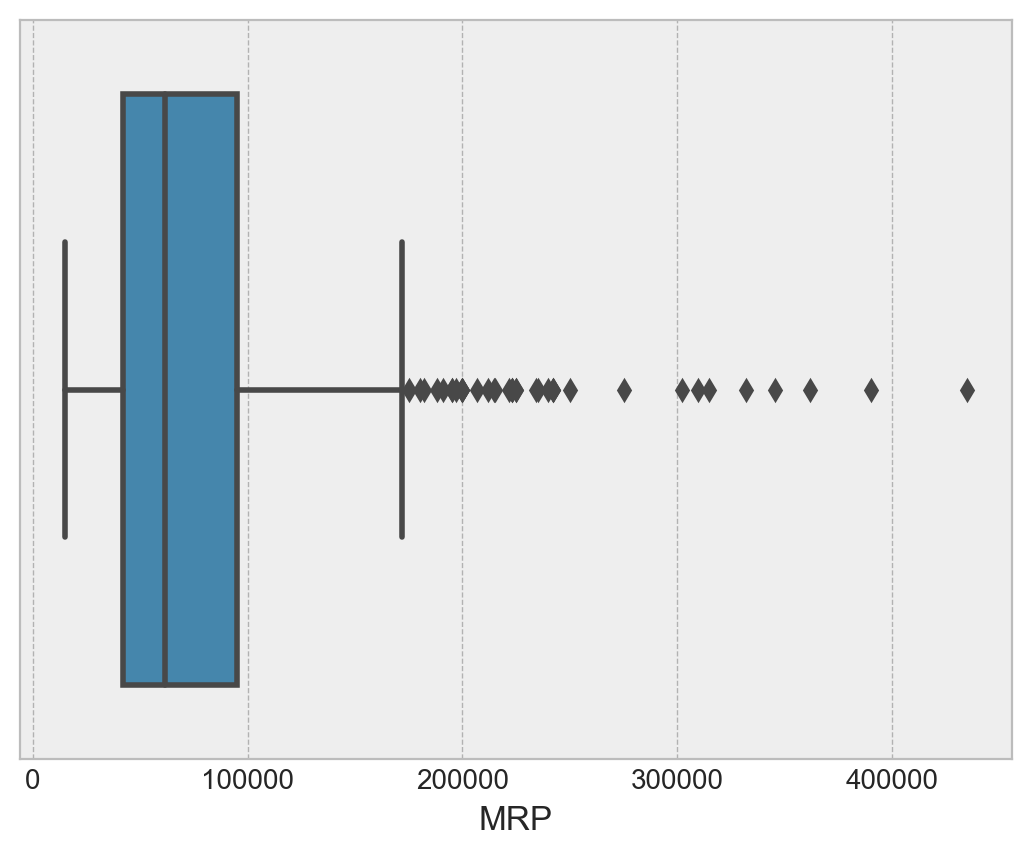

In [40]:
sns.boxplot(data=df,x='MRP')

In [41]:
df['mrplog']=np.log(df.MRP)

In [42]:
df

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM,mrplog
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8,10.518403
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8,10.596385
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8,10.403960
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8,10.819578
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,ASUS,8,10.819578
...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,4.3,76590,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel Core i5 Processor,DDR5,64 bit Windows 11 Operating System,512 GB SSD,DELL,16,11.246222
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,90000,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,16,11.407565
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,LPDDR4,Chrome Operating System,512 GB SSD,ASUS,4,10.064330
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,LPDDR5,64 bit Windows 11 Operating System,512 GB SSD,ASUS,16,11.743958


<AxesSubplot:xlabel='mrplog'>

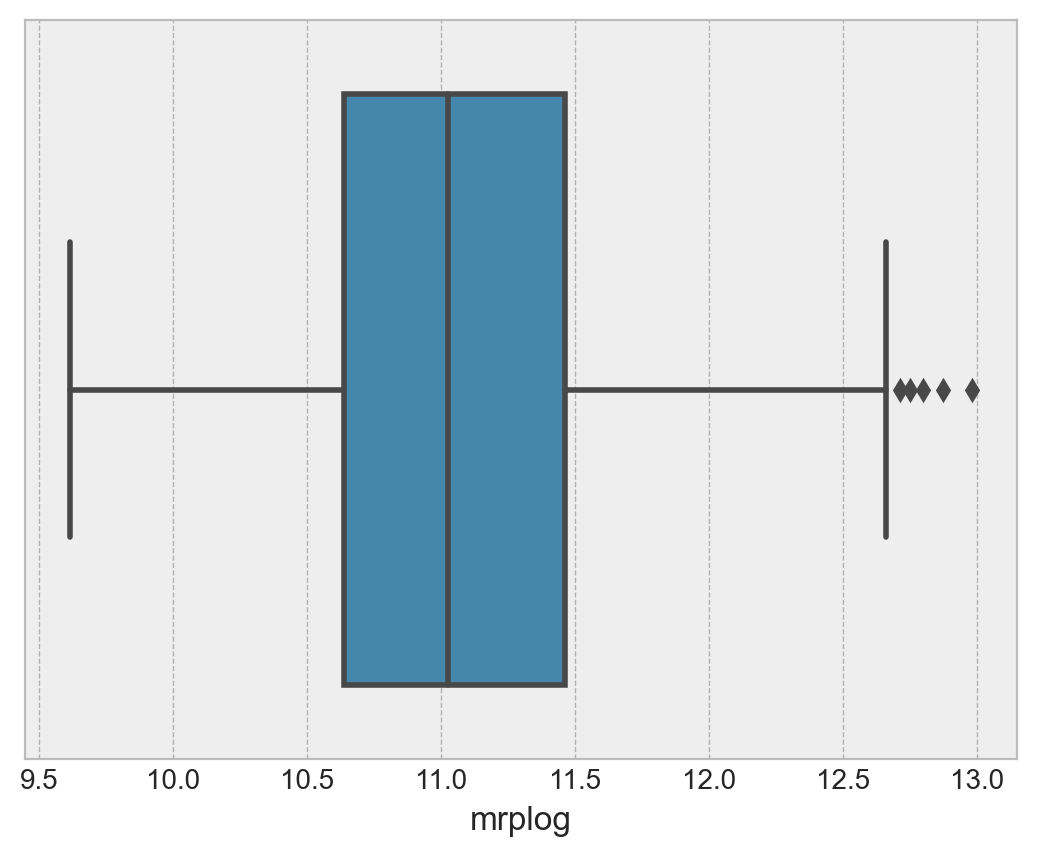

In [43]:
sns.boxplot(data=df,x='mrplog')

In [44]:
df.reset_index()

,index,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM,mrplog
0,0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8,10.518403
1,1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8,10.596385
2,2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8,10.403960
3,3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8,10.819578
4,4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,Windows 11 Operating System,512 GB SSD,ASUS,8,10.819578
...,...,...,...,...,...,...,...,...,...,...,...,...
418,713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,4.3,76590,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel Core i5 Processor,DDR5,64 bit Windows 11 Operating System,512 GB SSD,DELL,16,11.246222
419,714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,90000,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,16,11.407565
420,715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,LPDDR4,Chrome Operating System,512 GB SSD,ASUS,4,10.064330
421,718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,LPDDR5,64 bit Windows 11 Operating System,512 GB SSD,ASUS,16,11.743958


In [45]:
df.OS.unique()

array(['64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System',
       'Windows 11 Operating System', 'Mac OS Operating System',
       'DOS Operating System', 'Windows 10 Operating System',
       'Chrome Operating System', '32 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplaySystem',
       '64 bit DOS Operating System', '64 bit Chrome Operating System'],
      dtype=object)

In [46]:
df.RAM.unique()

array(['8', '16', '4', '32'], dtype=object)

In [47]:
df.Processor.unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel OptaneIntel Core i3 Processor',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor',
       'Intel Evo Core i5 ProcessorIntel Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Intel Pentium Silver Processor', 'M1 Max Processor',
       'Intel Core i9 Processor', 'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [48]:
df.Brand.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [49]:
df.Storage.unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '1 TB HDD', '128 GB SSD',
       '1 TB HDD512 GB SSD', '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'],
      dtype=object)

In [50]:
df.RAM_TYPE=df.RAM_TYPE.str.strip()

In [51]:
df.Storage.replace('128 GB SSD1 TB HDD128 GB SSD','1 TB HDD 128 GB SSD',inplace=True)
df.Storage.replace('1 TB HDD 512 GB SSd','1 TB HDD 512 GB SSD',inplace=True)
df.Storage.replace('1 TB HDD256 GB SSD','1 TB HDD 256 GB SSD',inplace=True)
df.Storage.replace('256 GB HDD256 GB SSD','256 GB HDD 256 GB SSD',inplace=True)
df.Storage.replace('1 TB HDD512 GB SSD','1 TB HDD 512 GB SSD',inplace=True)
df.OS.replace('64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplaySystem','64 bit Windows 10 Operating System',inplace=True)
df.OS.replace('Windows 11 Operating System','64 bit Windows 11 Operating System',inplace=True)
df.OS.replace('DOS Operating System','64 bit DOS Operating System',inplace=True)
df.OS.replace('Chrome Operating System','64 bit Chrome Operating System',inplace=True)
df.OS.replace('Windows 10 Operating System','32 bit Windows 11 Operating System',inplace=True)
df.RAM_TYPE.replace('SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and  DDR4','DDR4',inplace=True)
df.Processor.replace('Intel Evo Core i5 ProcessorIntel Core i5 Processor','Intel Core i5 Processor',inplace=True)
df.Processor.replace('Intel OptaneIntel Core i3 Processor','Intel Core i3 Processor',inplace=True)

In [52]:
from scipy import stats

In [53]:
df['mrpboxcox'],lamda=stats.boxcox(df.MRP)

In [54]:
df['mrpboxcox']

0      2.966419
1      2.968910
2      2.962647
3      2.975699
4      2.975699
         ...   
713    2.987378
714    2.991388
715    2.950586
718    2.999100
719    2.976278
Name: mrpboxcox, Length: 423, dtype: float64

<AxesSubplot:xlabel='mrpboxcox'>

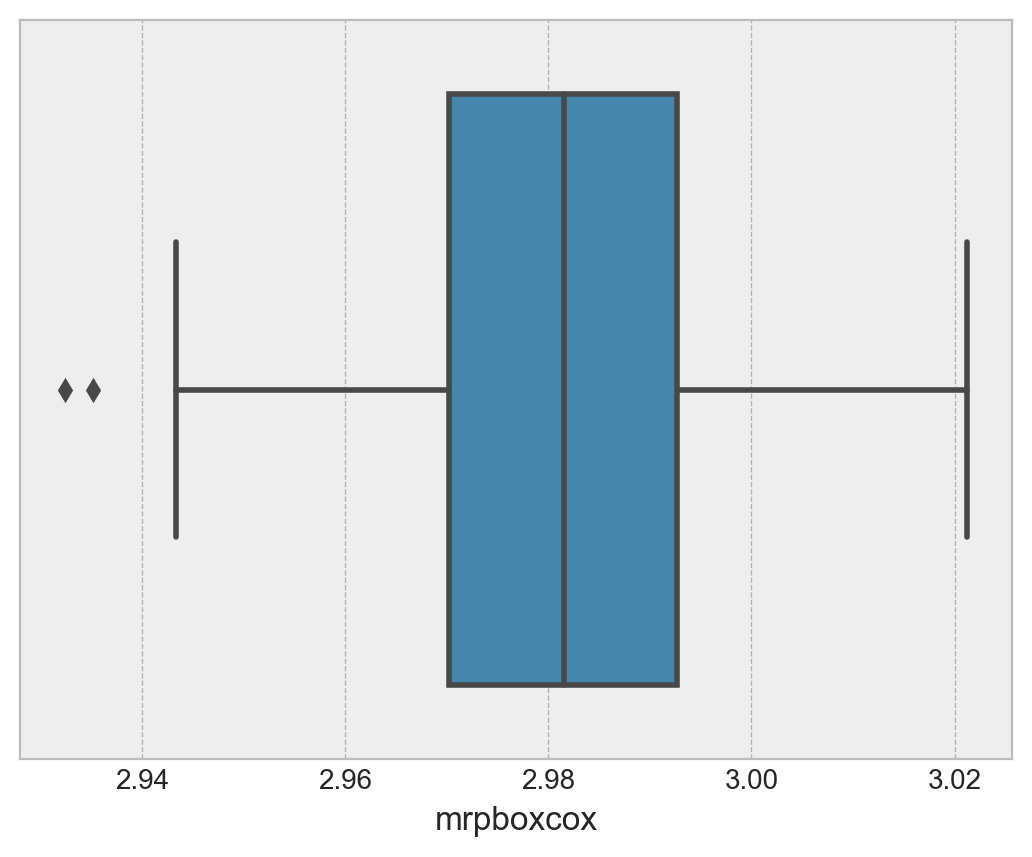

In [55]:
sns.boxplot(data=df,x='mrpboxcox')

In [56]:
df

,Product,Rating,MRP,Feature,Processor,RAM_TYPE,OS,Storage,Brand,RAM,mrplog,mrpboxcox
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,256 GB SSD,Lenovo,8,10.518403,2.966419
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,Lenovo,8,10.596385,2.968910
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8,10.403960,2.962647
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,8,10.819578,2.975699
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,DDR4,64 bit Windows 11 Operating System,512 GB SSD,ASUS,8,10.819578,2.975699
...,...,...,...,...,...,...,...,...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,4.3,76590,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel Core i5 Processor,DDR5,64 bit Windows 11 Operating System,512 GB SSD,DELL,16,11.246222,2.987378
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,90000,AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core Processor,DDR4,64 bit Windows 10 Operating System,512 GB SSD,HP,16,11.407565,2.991388
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,LPDDR4,64 bit Chrome Operating System,512 GB SSD,ASUS,4,10.064330,2.950586
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,LPDDR5,64 bit Windows 11 Operating System,512 GB SSD,ASUS,16,11.743958,2.999100


In [57]:
df.Processor.value_counts()

Intel Core i5 Processor                   111
Intel Core i3 Processor                    73
Intel Core i7 Processor                    53
AMD Ryzen 5 Hexa Core Processor            41
AMD Ryzen 7 Octa Core Processor            38
Intel Celeron Dual Core Processor          18
AMD Ryzen 3 Dual Core Processor            17
AMD Ryzen 9 Octa Core Processor            16
Intel Core i9 Processor                    11
AMD Ryzen 5 Quad Core Processor             8
M1 Processor                                7
M1 Pro Processor                            6
Apple M2 Processor                          5
AMD Ryzen 3 Quad Core Processor             3
Intel Pentium Silver Processor              3
Intel Celeron Quad Core Processor           2
AMD Athlon Dual Core Processor              2
AMD Ryzen 5 Dual Core Processor             2
Intel Pentium Quad Core Processor           2
Qualcomm Snapdragon 7c Gen 2 Processor      1
M1 Max Processor                            1
AMD Ryzen 7 Quad Core Processor   

In [58]:
df.Storage.value_counts()

512 GB SSD               232
1 TB SSD                  74
256 GB SSD                63
1 TB HDD 256 GB SSD       25
1 TB HDD                  14
2 TB SSD                   6
128 GB SSD                 4
1 TB HDD 512 GB SSD        2
1 TB HDD 128 GB SSD        2
256 GB HDD 256 GB SSD      1
Name: Storage, dtype: int64

#  Data Visualization

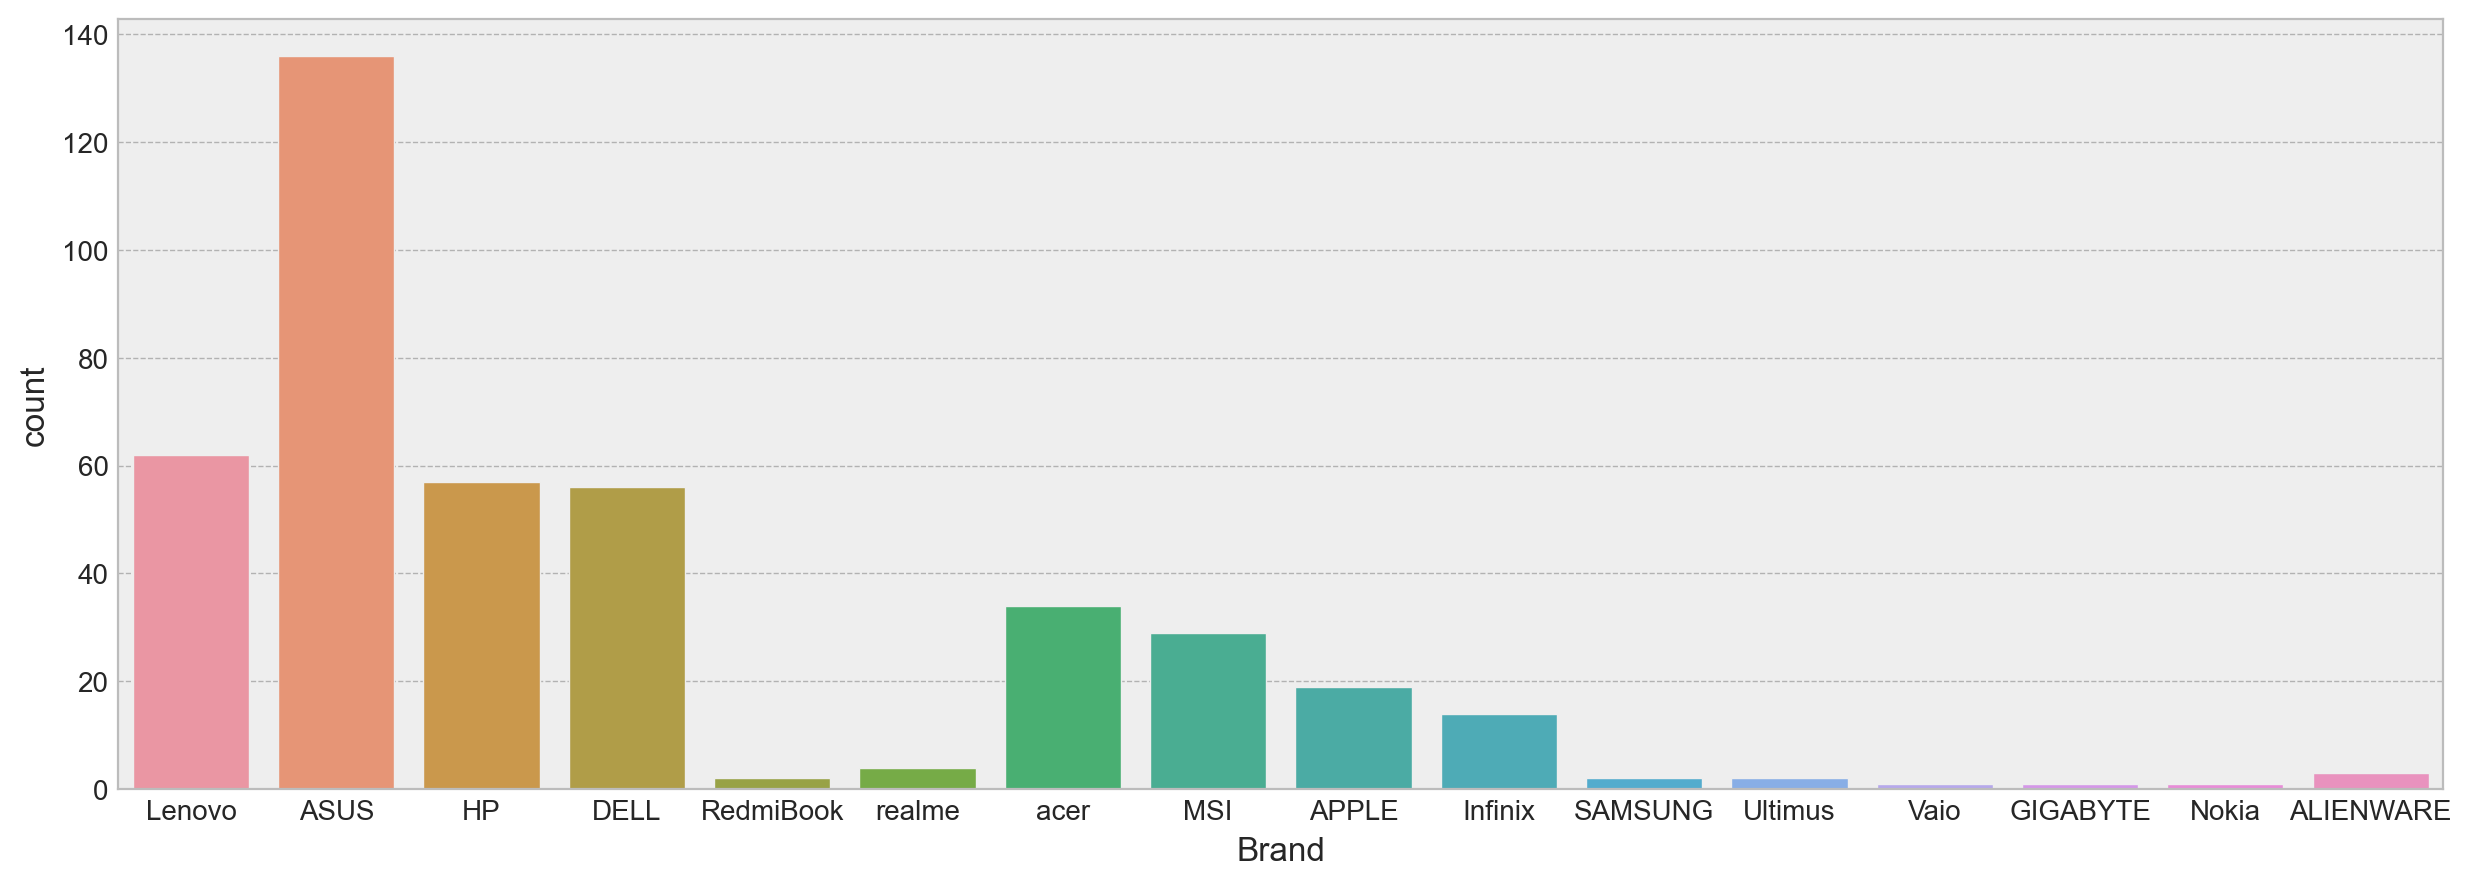

In [63]:
plt.figure(figsize=(15,5), dpi = 100)
sns.countplot(data=df,x='Brand');


### Insights:
1. We can observe that there is an imbalance in Data the given Data
2. **`ASUS`** has occupied most of the share compared to all other brands
3. **`Lenovo`**,**`HP`** and **`DELL`** are the second most highest share compared to other brands

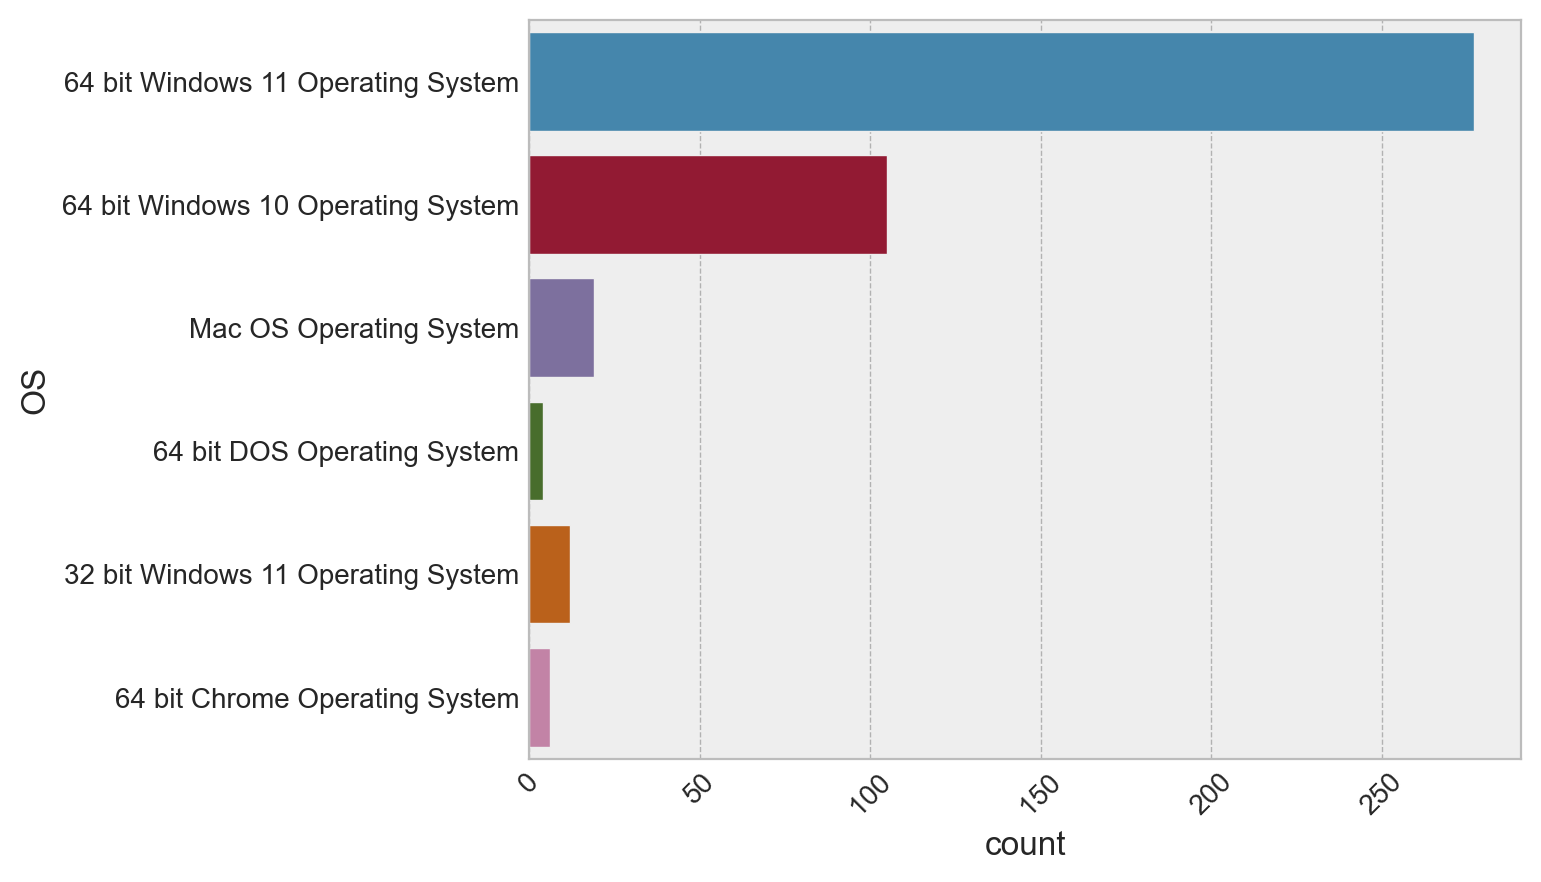

In [65]:
sns.countplot(data=df,y='OS')
plt.xticks(rotation = 45,);

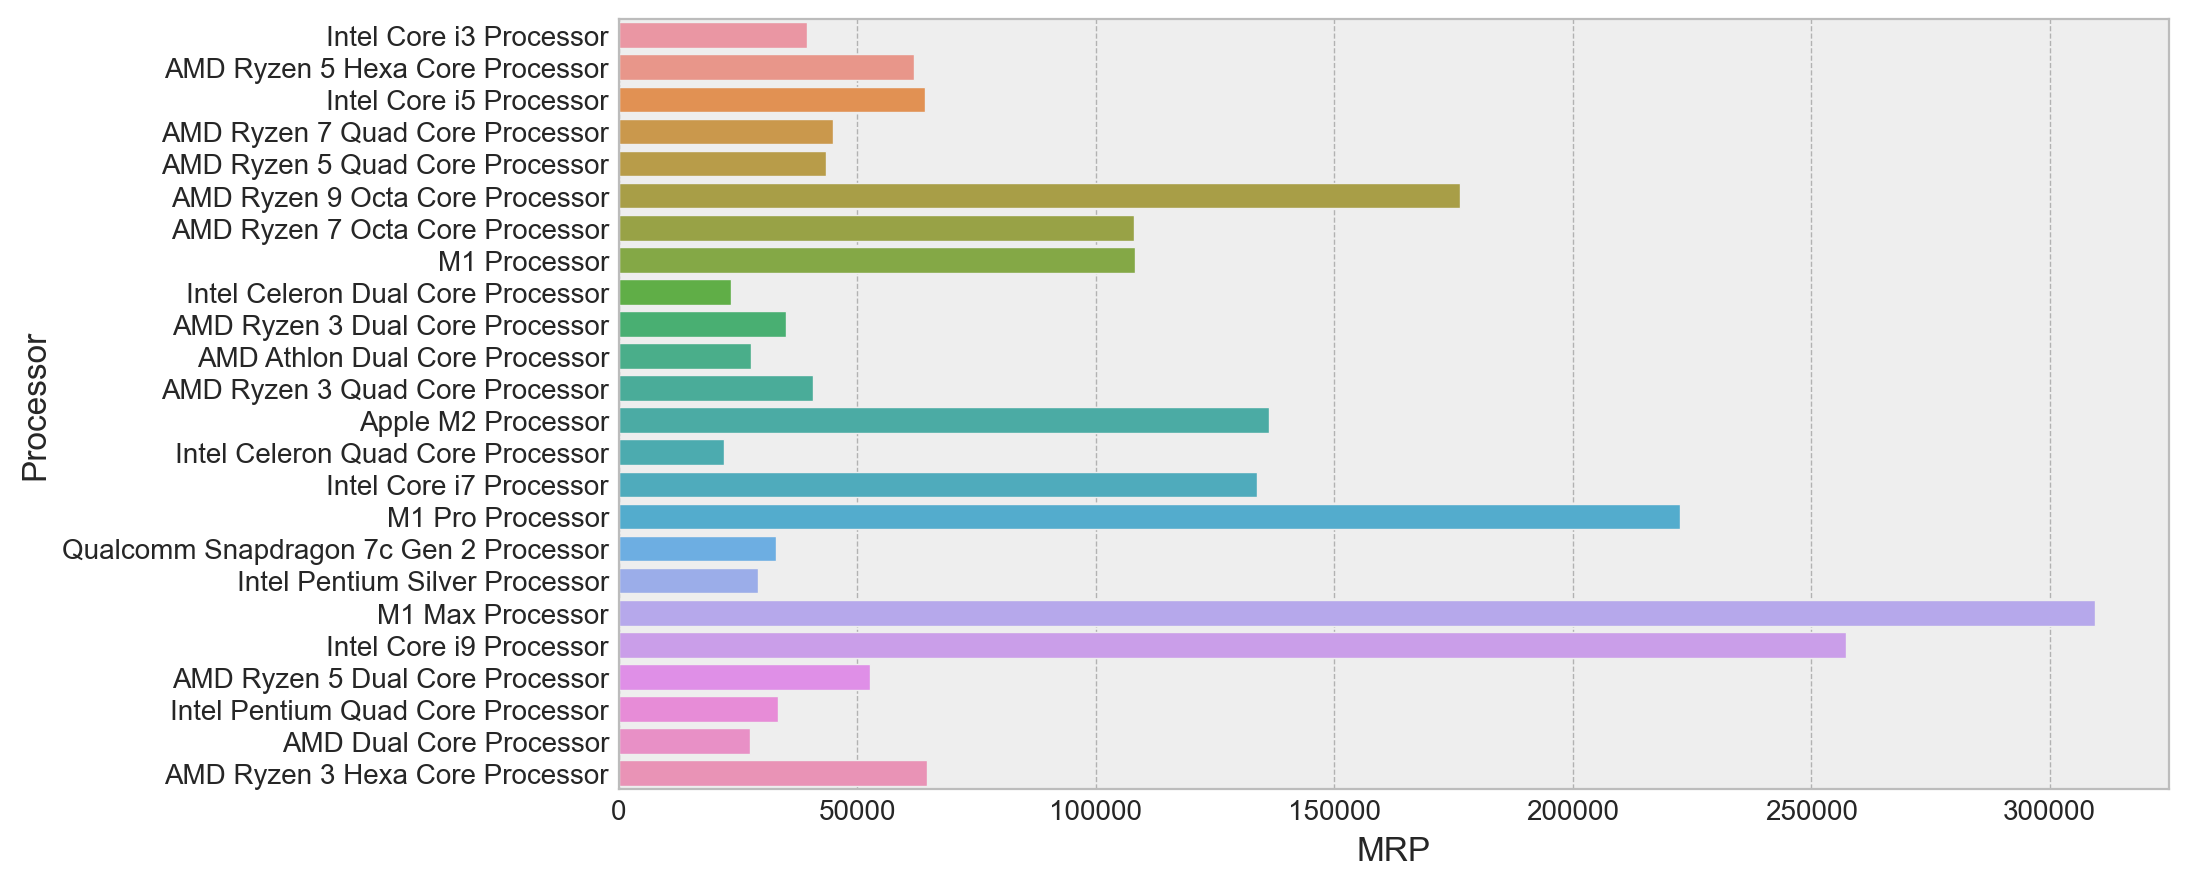

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(data = df,x='MRP', y='Processor', orient='h', ci=False);

### Insights:
1. **`M1 Max Processor`** has Highest price compared to all the Processor.
2. **`Intel Core i9 Processor`** and **`M1 Pro Processor`** has second high priced laptops based on the Processor.
3. we can say that if the Processor is increased then the price is also increased.

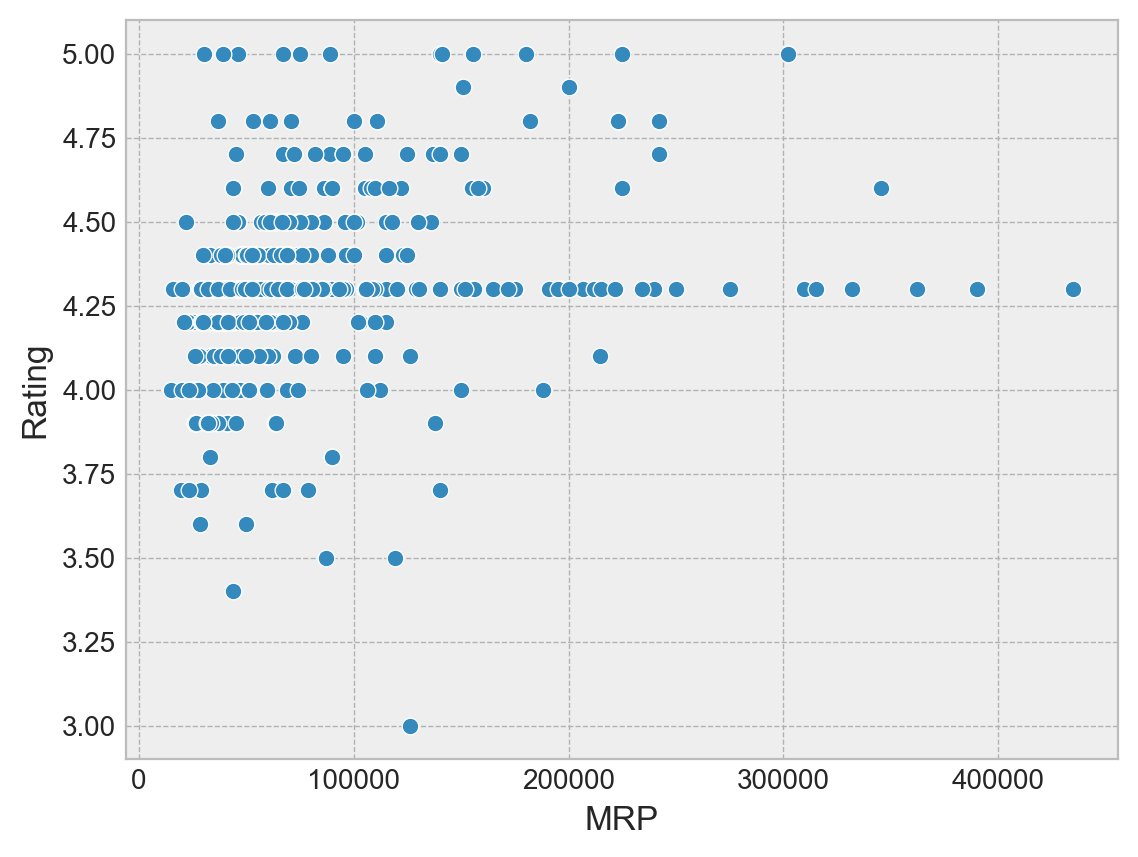

In [68]:
sns.scatterplot(x=df.MRP,y=df.Rating);

## Insights:
1. More rated laptops above 4 are more Under 2 lakhs.
2. Maximum purchasing of laptops are under 2 lakhs.
3. As Price increasing then the rating is constant which is `4.25`.

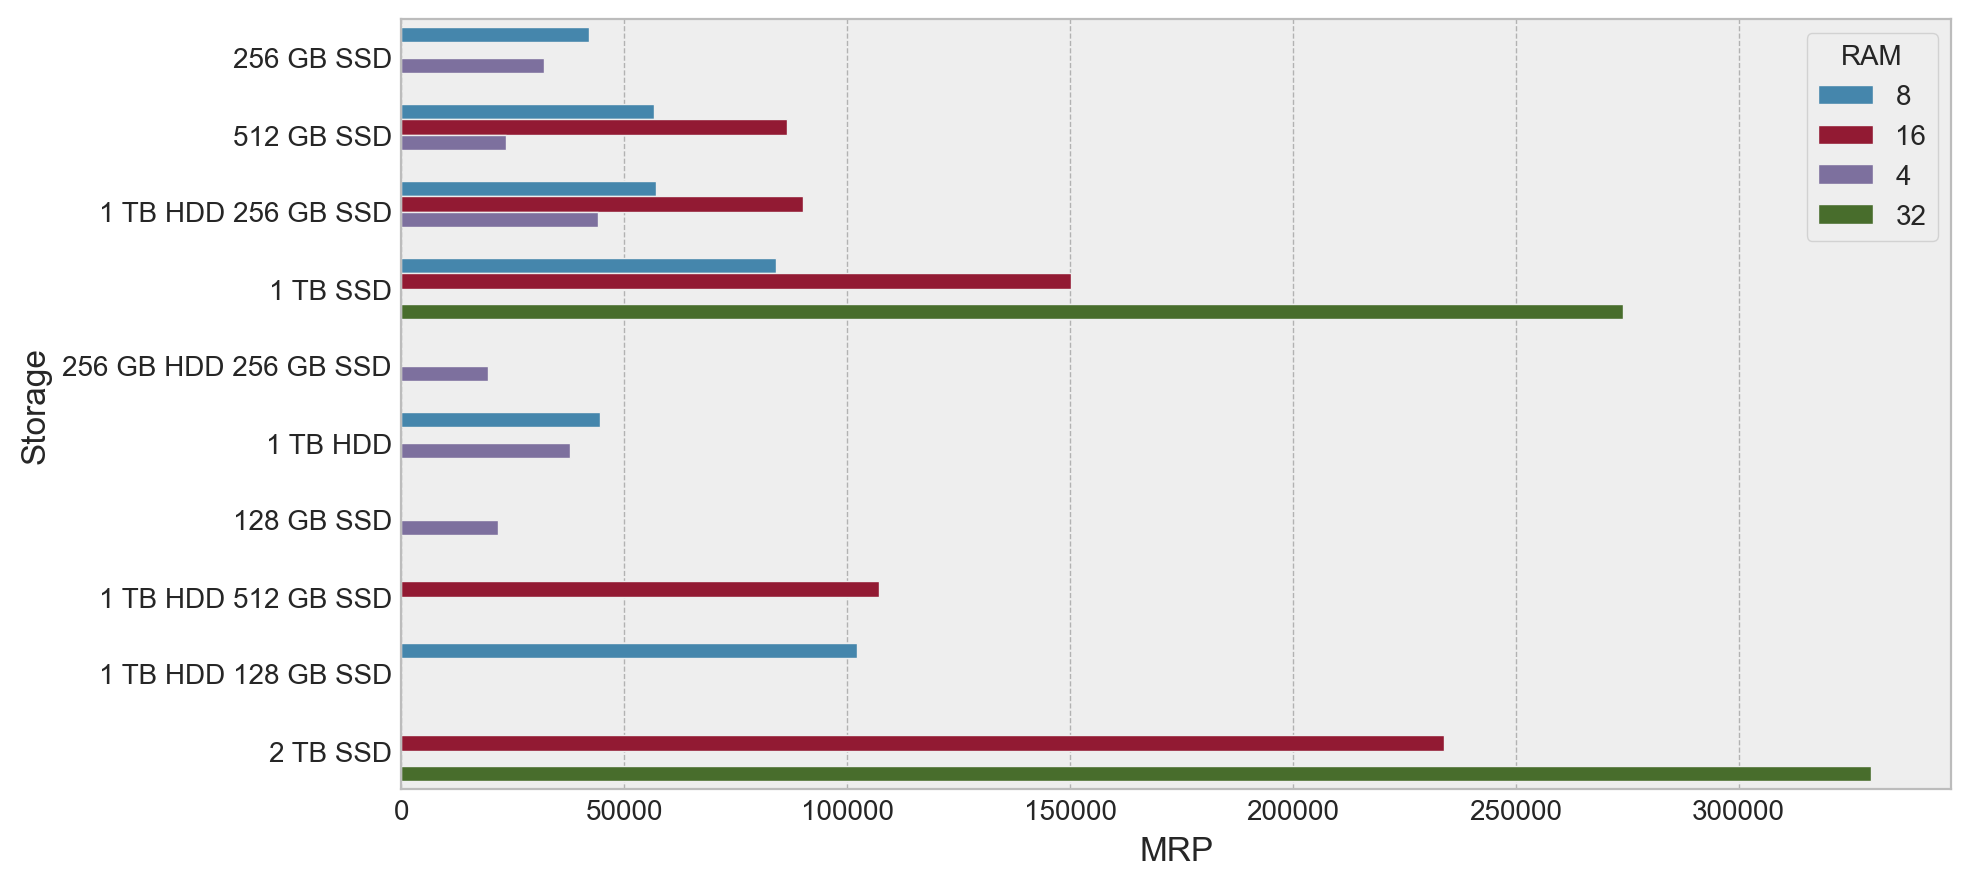

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.MRP,y=df.Storage,hue=df.RAM, ci=False);

### Insights:
1. By Observing the above we can say that as the **`2 TB SSD Storage`** then the price is High above 3 lakhs.
2. if the Storage is in TB then the Price of the laptop is more.
3. Price depends on the various features of laptop ram and storage.

# Model Building

### a. Identify the Target Variable and Splitting the Data into Train and Test


In [73]:
X=df[['RAM','Processor','Storage','OS','RAM_TYPE']]
y=df['mrpboxcox']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, 
                                                    random_state = 0)

In [75]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(359, 5) (359,)
(64, 5) (64,)


### b. Separating Categorical and Numerical Columns:

In [76]:
X_train.dtypes

RAM          object
Processor    object
Storage      object
OS           object
RAM_TYPE     object
dtype: object

**All the features we are taking here are having Some Order so no nominal columns No need of OneHotCoding So I am applying Label Encoding**

### Applying Label Encoding

In [77]:
X_train_cat_ord=X_train[['Storage','OS','RAM','RAM_TYPE','Processor']]

In [78]:
X_train_cat_ord.Storage.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD 256 GB SSD', '1 TB HDD',
       '1 TB SSD', '1 TB HDD 512 GB SSD', '1 TB HDD 128 GB SSD',
       '256 GB HDD 256 GB SSD', '2 TB SSD', '128 GB SSD'], dtype=object)

1) 2 TB SSD<br>
2) 1 TB HDD 512 GB SSd<br>
3) 1 TB HDD 256 GB SSD<br>
4) 256 GB HDD 256 SSD<br>
5) 1 TB SSD<br>
6) 512 GB SSD<br>
7) 1 TB HDD<br>
8) 256 GB SSD<br>
9) 128 GB SSD<br>

In [79]:
X_train_cat_ord.OS.unique()

array(['64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System', 'Mac OS Operating System',
       '64 bit DOS Operating System',
       '32 bit Windows 11 Operating System',
       '64 bit Chrome Operating System'], dtype=object)

1) Mac OS Operating System <br>
2) 64 bit Windows 11 OS <br>
3) 64 bit Windows 10 OS <br>
4) 32 bit Windows 11 OS <br>
5) 64 bit DOS OS <br>
6) 64 bit Chrome OS<br>

In [80]:
df.Processor.nunique()

24

M1 Max Processor<br>
M1 Pro Processor <br>
Apple M2 Processor<br>
M1 Processor<br>
Qualcomm Snapdragon 7c Gen 2 Processor
AMD Ryzen 9 Octa Core Processor<br>
Intel Core i9 Processor<br>
AMD Ryzen 7 Octa Core Processor<br>
Intel Core i7 Processor<br>
AMD Ryzen 7 Quad Core Processor<br>
AMD Ryzen 5 Hexa Core Processor<br>
Intel Core i5 Processor<br>
AMD Ryzen 5 Quad Core Processor <br>
AMD Ryzen 5 Dual Core Processor<br>
AMD Ryzen 3 Hexa Core Processor<br>
Intel Core i3 Processor<br>
AMD Ryzen 3 Quad Core Processor<br>
AMD Ryzen 3 Dual Core Processor<br>
Intel Pentium Quad Core Processor<br>
Intel Celeron Quad Core Processor<br>
Intel Pentium Silver Processor<br>
Intel Celeron Dual Core Processor <br>
AMD Athlon Dual Core Processor<br>
AMD Dual Core Processor<br>

1) 2 TB SSD
2) 1 TB HDD 512 GB SSd
3) 1 TB HDD 256 GB SSD
4) 1 TB HDD 128 GB SSD
5) 256 GB HDD 256 SSD
6) 1 TB SSD
7) 512 GB SSD
8) 1 TB HDD
9) 256 GB SSD
10) 128 GB SSD

In [81]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_ord.index)

X_train_cat_le.head()

""
238
202
302
229
389


In [82]:
# processor
cut_encoder = {'Intel Core i3 Processor': 9,'Intel Core i5 Processor': 13,
    'AMD Ryzen 7 Quad Core Processor': 15,'AMD Ryzen 5 Quad Core Processor': 12,
    'AMD Ryzen 9 Octa Core Processor': 19,'AMD Ryzen 7 Octa Core Processor': 17,'M1 Processor': 21,
    'Intel Celeron Dual Core Processor': 3,'AMD Ryzen 3 Dual Core Processor': 7,'AMD Athlon Dual Core Processor': 2,
    'AMD Ryzen 3 Quad Core Processor': 8,'Apple M2 Processor': 22,'Intel Celeron Quad Core Processor': 5,
    'Intel Core i7 Processor': 16,'M1 Pro Processor': 23,'Qualcomm Snapdragon 7c Gen 2 Processor': 20,
    'Intel Pentium Silver Processor': 4,'M1 Max Processor': 24,'Intel Core i9 Processor': 18,
    'AMD Ryzen 5 Dual Core Processor': 11,'Intel Pentium Quad Core Processor': 6,'AMD Dual Core Processor': 1,
    'AMD Ryzen 3 Hexa Core Processor': 10,'AMD Ryzen 5 Hexa Core Processor': 14}

X_train_cat_le['Processor'] = X_train_cat_ord['Processor'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,Processor
238,7
202,3
302,9
229,21
389,4


In [83]:
# Storage
cut_encoder = {'128 GB SSD' : 1,'256 GB SSD' : 2,'1 TB HDD' : 3, '512 GB SSD' : 4, '1 TB SSD' : 5, '256 GB HDD 256 GB SSD' : 6,'1 TB HDD 128 GB SSD' : 7, '1 TB HDD 256 GB SSD' : 8,'1 TB HDD 512 GB SSD' : 9,'2 TB SSD' : 10}

X_train_cat_le['Storage'] = X_train_cat_ord['Storage'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,Processor,Storage
238,7,4
202,3,2
302,9,4
229,21,2
389,4,2


1) Mac OS Operating System
2) 64 bit Windows 11 OS
3) 64 bit Windows 10 OS
4) 32 bit Windows 11 OS
5) 64 bit DOS OS
6) 64 bit Chrome OS

In [84]:
# OS
cut_encoder = {'64 bit Chrome Operating System' : 1,'64 bit DOS Operating System' : 2,'32 bit Windows 11 Operating System' : 3, '64 bit Windows 10 Operating System' : 4, '64 bit Windows 11 Operating System' : 5, 'Mac OS Operating System' : 6}

X_train_cat_le['OS'] = X_train_cat_ord['OS'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,Processor,Storage,OS
238,7,4,5
202,3,2,4
302,9,4,5
229,21,2,6
389,4,2,5


In [85]:
df.RAM.unique()

array(['8', '16', '4', '32'], dtype=object)

In [86]:
# RAM
cut_encoder = {'4' : 1,'8' : 2,'16' : 3, '32' : 4}

X_train_cat_le['RAM'] = X_train_cat_ord['RAM'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,Processor,Storage,OS,RAM
238,7,4,5,2
202,3,2,4,1
302,9,4,5,2
229,21,2,6,2
389,4,2,5,2


In [87]:
df.RAM_TYPE.unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified Memory', 'LPDDR4X', 'LPDDR5',
       'LPDDR3'], dtype=object)

In [88]:
# RAM_TYPE
cut_encoder = {'DDR4' : 1,'DDR5' : 2,'LPDDR3' : 3, 'LPDDR4' : 4, 'LPDDR5' : 5,'LPDDR4X' : 6,'Unified Memory' : 7}

X_train_cat_le['RAM_TYPE'] = X_train_cat_ord['RAM_TYPE'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,Processor,Storage,OS,RAM,RAM_TYPE
238,7,4,5,2,1
202,3,2,4,1,1
302,9,4,5,2,1
229,21,2,6,2,1
389,4,2,5,2,1


In [89]:
X_train_transformed = X_train_cat_le

X_train_transformed.head()

,Processor,Storage,OS,RAM,RAM_TYPE
238,7,4,5,2,1
202,3,2,4,1,1
302,9,4,5,2,1
229,21,2,6,2,1
389,4,2,5,2,1


###  TEST


In [90]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,RAM,Processor,Storage,OS,RAM_TYPE
244,8,Intel Core i5 Processor,512 GB SSD,64 bit Windows 11 Operating System,DDR4
21,8,Intel Core i3 Processor,512 GB SSD,64 bit Windows 11 Operating System,DDR4
714,16,AMD Ryzen 7 Octa Core Processor,512 GB SSD,64 bit Windows 10 Operating System,DDR4
10,8,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,64 bit Windows 11 Operating System,DDR4
134,8,AMD Athlon Dual Core Processor,512 GB SSD,64 bit Windows 11 Operating System,DDR4


In [93]:
X_test_cat_ord=X_test[['Storage','OS','RAM','RAM_TYPE','Processor']]

In [94]:
X_test_cat_le = pd.DataFrame(index=X_test_cat_ord.index)

X_test_cat_le.head()

""
244
21
714
10
134


In [95]:
# processor
cut_encoder = {'Intel Core i3 Processor': 9,'Intel Core i5 Processor': 13,
    'AMD Ryzen 7 Quad Core Processor': 15,'AMD Ryzen 5 Quad Core Processor': 12,
    'AMD Ryzen 9 Octa Core Processor': 19,'AMD Ryzen 7 Octa Core Processor': 17,'M1 Processor': 21,
    'Intel Celeron Dual Core Processor': 3,'AMD Ryzen 3 Dual Core Processor': 7,'AMD Athlon Dual Core Processor': 2,
    'AMD Ryzen 3 Quad Core Processor': 8,'Apple M2 Processor': 22,'Intel Celeron Quad Core Processor': 5,
    'Intel Core i7 Processor': 16,'M1 Pro Processor': 23,'Qualcomm Snapdragon 7c Gen 2 Processor': 20,
    'Intel Pentium Silver Processor': 4,'M1 Max Processor': 24,'Intel Core i9 Processor': 18,
    'AMD Ryzen 5 Dual Core Processor': 11,'Intel Pentium Quad Core Processor': 6,'AMD Dual Core Processor': 1,
    'AMD Ryzen 3 Hexa Core Processor': 10,'AMD Ryzen 5 Hexa Core Processor': 14}

X_test_cat_le['Processor'] = X_test_cat_ord['Processor'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

,Processor
244,13
21,9
714,17
10,14
134,2


In [96]:
# Storage
cut_encoder = {'128 GB SSD' : 1,'256 GB SSD' : 2,'1 TB HDD' : 3, '512 GB SSD' : 4, '1 TB SSD' : 5, '256 GB HDD 256 GB SSD' : 6,'1 TB HDD 128 GB SSD' : 7, '1 TB HDD 256 GB SSD' : 8,'1 TB HDD 512 GB SSD' : 9,'2 TB SSD' : 10}

X_test_cat_le['Storage'] = X_test_cat_ord['Storage'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

,Processor,Storage
244,13,4
21,9,4
714,17,4
10,14,4
134,2,4


In [97]:
# OS
cut_encoder = {'64 bit Chrome Operating System' : 1,'64 bit DOS Operating System' : 2,'32 bit Windows 11 Operating System' : 3, '64 bit Windows 10 Operating System' : 4, '64 bit Windows 11 Operating System' : 5, 'Mac OS Operating System' : 6}

X_test_cat_le['OS'] = X_test_cat_ord['OS'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

,Processor,Storage,OS
244,13,4,5
21,9,4,5
714,17,4,4
10,14,4,5
134,2,4,5


In [98]:
# RAM
cut_encoder = {'4' : 1,'8' : 2,'16' : 3, '32' : 4}

X_test_cat_le['RAM'] = X_test_cat_ord['RAM'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

,Processor,Storage,OS,RAM
244,13,4,5,2
21,9,4,5,2
714,17,4,4,3
10,14,4,5,2
134,2,4,5,2


In [99]:
# RAM_TYPE
cut_encoder = {'DDR4' : 1,'DDR5' : 2,'LPDDR3' : 3, 'LPDDR4' : 4, 'LPDDR5' : 5,'LPDDR4X' : 6,'Unified Memory' : 7}

X_test_cat_le['RAM_TYPE'] = X_test_cat_ord['RAM_TYPE'].apply(lambda x : cut_encoder[x])

X_test_cat_le.head()

,Processor,Storage,OS,RAM,RAM_TYPE
244,13,4,5,2,1
21,9,4,5,2,1
714,17,4,4,3,1
10,14,4,5,2,1
134,2,4,5,2,1


In [100]:
X_test_transformed = X_test_cat_le

X_test_transformed.head()

,Processor,Storage,OS,RAM,RAM_TYPE
244,13,4,5,2,1
21,9,4,5,2,1
714,17,4,4,3,1
10,14,4,5,2,1
134,2,4,5,2,1


In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)

LinearRegression()

In [102]:
cost_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
cost_df

,Actual,Predicted
244,2.980890,2.978485
21,2.969686,2.969996
714,2.991388,2.996261
10,2.980890,2.980607
134,2.958692,2.955141
...,...,...
408,2.986838,2.986996
308,2.981074,2.978755
6,2.968108,2.974599
1,2.968910,2.969996


<AxesSubplot:xlabel='mrpboxcox', ylabel='Count'>

<AxesSubplot:xlabel='mrpboxcox', ylabel='Count'>

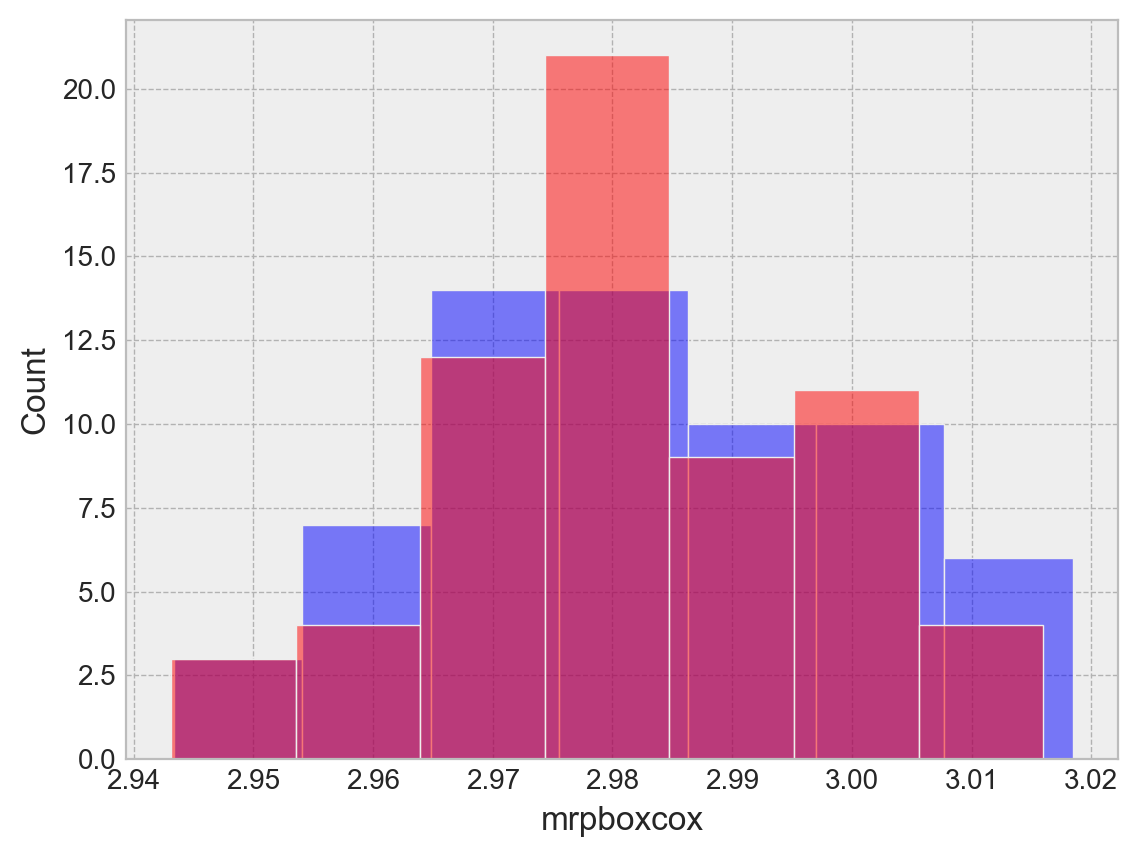

In [103]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [104]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.004865385731833351
Mean Squared Error:  4.078924308657007e-05
Root Mean Squared Error:  0.00638664568350007


In [105]:
from scipy.special import inv_boxcox
inv_boxcox(y_test,lamda)

244    59990.0
21     40990.0
714    90000.0
10     59990.0
134    29390.0
        ...   
408    74990.0
308    60390.0
6      38990.0
1      39990.0
525    62990.0
Name: mrpboxcox, Length: 64, dtype: float64

In [106]:
from scipy.special import inv_boxcox
inv_boxcox(y_test_pred,lamda)

array([ 55054.97464818,  41399.45563409, 110833.43923131,  59379.06597193,
        26588.32615969,  38816.04087544,  77785.45460416,  55054.97464818,
       111427.48179378,  19371.78853112,  53577.05930103, 112110.77879925,
       132816.2446709 ,  41399.45563409,  55054.97464818,  92714.67642765,
        55582.57601764, 143935.00618268,  65680.81905656,  53577.05930103,
        55054.97464818,  38488.0833432 ,  34986.78584236, 140248.26515272,
       104256.22697673,  38488.0833432 ,  41399.45563409,  22720.15521882,
        54755.10566633, 106204.6155737 ,  48159.82097708,  28075.1392812 ,
       202888.25308724,  55582.57601764,  22093.02467319,  36237.57427419,
        96640.68224414,  29169.84424915, 202888.25308724,  59379.06597193,
       139213.25844889,  55054.97464818, 104256.22697673, 136168.38196666,
       190815.63239563,  59047.59879903,  38488.0833432 ,  29607.23639849,
        37566.95003647,  65680.81905656,  62941.93883647,  55054.97464818,
       140248.26515272,  

In [110]:
r2

0.8644608536720212

In [109]:
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.8527764445058161


In [122]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[i for i in range(1, 40)]}]

clf = GridSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('R2 Score: ', clf.score(X_test_transformed, y_test))

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

Best parameters set found on train set
{'max_depth': 32}
DecisionTreeRegressor(max_depth=32)
R2 Score:  0.863990143277943


In [123]:
cv_results= pd.DataFrame(clf.cv_results_)

In [124]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001599,7.988814e-04,0.000800,4.002350e-04,1,{'max_depth': 1},0.514488,0.510633,0.576115,0.499663,...,0.503571,0.050891,39,0.533494,0.535248,0.518029,0.534184,0.543752,0.532941,0.008324
1,0.001201,4.004505e-04,0.001000,1.210077e-06,2,{'max_depth': 2},0.735819,0.737670,0.790273,0.703272,...,0.743762,0.028168,38,0.767015,0.775115,0.759832,0.772246,0.770186,0.768879,0.005240
2,0.001599,8.006342e-04,0.001200,4.000190e-04,3,{'max_depth': 3},0.808883,0.824249,0.874107,0.789918,...,0.824954,0.027962,37,0.866918,0.851451,0.837523,0.852526,0.836114,0.848906,0.011289
3,0.002185,4.086408e-04,0.002199,3.994980e-04,4,{'max_depth': 4},0.841910,0.842523,0.877748,0.803686,...,0.843162,0.023675,36,0.897121,0.877512,0.874834,0.886226,0.867035,0.880546,0.010309
4,0.001200,3.999472e-04,0.001000,9.536743e-08,5,{'max_depth': 5},0.828508,0.844438,0.873175,0.833534,...,0.845797,0.015577,35,0.915355,0.895230,0.902901,0.911696,0.894374,0.903911,0.008472
5,0.001000,4.909339e-07,0.001000,4.156970e-07,6,{'max_depth': 6},0.834885,0.871524,0.863131,0.817043,...,0.847677,0.019630,33,0.927285,0.914690,0.921159,0.926920,0.924048,0.922820,0.004628
6,0.001000,5.722046e-07,0.000800,3.999949e-04,7,{'max_depth': 7},0.836333,0.865496,0.862778,0.838434,...,0.852284,0.012394,23,0.938285,0.931431,0.935013,0.938173,0.931377,0.934856,0.003054
7,0.001400,4.899598e-04,0.000600,4.898235e-04,8,{'max_depth': 8},0.854711,0.869092,0.851132,0.841616,...,0.857489,0.011086,7,0.945277,0.936730,0.941614,0.944409,0.938545,0.941315,0.003288
8,0.001200,4.001382e-04,0.001000,1.784161e-07,9,{'max_depth': 9},0.855875,0.823302,0.859243,0.840850,...,0.851062,0.017826,26,0.946892,0.938842,0.943366,0.947786,0.941987,0.943775,0.003271
9,0.001402,4.888175e-04,0.000598,4.886630e-04,10,{'max_depth': 10},0.857007,0.813796,0.857671,0.843003,...,0.849164,0.020281,30,0.947445,0.940700,0.944904,0.948124,0.944600,0.945155,0.002618


In [125]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
tuned_parameters = [{'n_neighbors':[i for i in range(1, 40)],'p':[1,2,3]}]

clf = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('R2 Score: ', clf.score(X_test_transformed, y_test))

Fitting 5 folds for each of 117 candidates, totalling 585 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

Best parameters set found on train set
{'n_neighbors': 5, 'p': 1}
KNeighborsRegressor(p=1)
R2 Score:  0.8714476904162642


In [126]:
cv_results= pd.DataFrame(clf.cv_results_)
cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002200,0.001962,0.001815,0.000747,1,1,"{'n_neighbors': 1, 'p': 1}",0.742570,0.790936,0.766446,...,0.777065,0.021638,107,0.892418,0.887242,0.893538,0.915469,0.908398,0.899413,0.010678
1,0.001427,0.000499,0.001188,0.000368,1,2,"{'n_neighbors': 1, 'p': 2}",0.742570,0.790597,0.782736,...,0.780890,0.022932,104,0.892418,0.887242,0.893538,0.915469,0.908398,0.899413,0.010678
2,0.001206,0.000398,0.001596,0.000487,1,3,"{'n_neighbors': 1, 'p': 3}",0.742570,0.790597,0.782736,...,0.780890,0.022932,104,0.892418,0.887242,0.893538,0.915469,0.908398,0.899413,0.010678
3,0.001012,0.000031,0.001208,0.000393,2,1,"{'n_neighbors': 2, 'p': 1}",0.828987,0.841534,0.874286,...,0.838334,0.019855,24,0.904748,0.898406,0.914129,0.922418,0.910909,0.910122,0.008173
4,0.000996,0.000010,0.000994,0.000008,2,2,"{'n_neighbors': 2, 'p': 2}",0.827131,0.839975,0.877013,...,0.841286,0.019691,18,0.906724,0.899343,0.914163,0.922221,0.911645,0.910819,0.007620
5,0.001203,0.000397,0.001184,0.000404,2,3,"{'n_neighbors': 2, 'p': 3}",0.827131,0.839975,0.877013,...,0.841286,0.019691,18,0.906724,0.899343,0.914163,0.922221,0.911645,0.910819,0.007620
6,0.001007,0.000007,0.000993,0.000014,3,1,"{'n_neighbors': 3, 'p': 1}",0.834771,0.844093,0.869790,...,0.847519,0.012496,6,0.911549,0.902597,0.906726,0.908967,0.901717,0.906311,0.003730
7,0.001009,0.000009,0.000999,0.000002,3,2,"{'n_neighbors': 3, 'p': 2}",0.837053,0.811936,0.875546,...,0.843905,0.020475,14,0.912329,0.901611,0.904822,0.908828,0.900492,0.905616,0.004434
8,0.001215,0.000393,0.001210,0.000397,3,3,"{'n_neighbors': 3, 'p': 3}",0.837053,0.811936,0.875546,...,0.843905,0.020475,14,0.912329,0.901611,0.904822,0.908828,0.900492,0.905616,0.004434
9,0.001425,0.000497,0.001164,0.000434,4,1,"{'n_neighbors': 4, 'p': 1}",0.847920,0.842635,0.866981,...,0.853829,0.008976,2,0.903058,0.894377,0.897172,0.906562,0.902546,0.900743,0.004376


In [127]:
from sklearn.linear_model import Lasso
tuned_parameters = [{'alpha':[i for i in range(1, 10)]}]

clf = GridSearchCV(
    estimator=Lasso(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [128]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('R2 Score: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'alpha': 1}
Lasso(alpha=1)
R2 Score:  -0.00019117564053905411


In [129]:
cv_results= pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003604,0.004263,0.000988,0.000619,1,{'alpha': 1},-0.007219,-0.014908,-0.001171,-0.001442,...,-0.004974,0.005552,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001398,0.000493,0.000631,0.000517,2,{'alpha': 2},-0.007219,-0.014908,-0.001171,-0.001442,...,-0.004974,0.005552,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001002,0.000006,0.001019,0.000033,3,{'alpha': 3},-0.007219,-0.014908,-0.001171,-0.001442,...,-0.004974,0.005552,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001207,0.000403,0.000596,0.000487,4,{'alpha': 4},-0.007219,-0.014908,-0.001171,-0.001442,...,-0.004974,0.005552,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001570,0.000499,0.000617,0.000504,5,{'alpha': 5},-0.007219,-0.014908,-0.001171,-0.001442,...,-0.004974,0.005552,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
